These results are for HBM-stack DRAM cache (16 interface of 128-MB) backed-up by DDR4 memory (2 interface of 32-GB).

In [5]:
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt

import os

datadir = '/home/babaie/projects/ispass2023/runs/hypothesisTest/dramCacheController/myPlots/ddr4'


def getStat(filename, stat):
    filename = os.path.join(filename).replace('\\','/')
    #print(stat)
    #print(filename)
    try:
        with open(filename) as f:
            readlines = f.readlines()
            for l in readlines:
                if stat in l:
                    return l
            return 0.0 #for cases where stat was not found
    except: #for cases where the file was not found
        return 0.0



Stats = ['system.generator.numPackets',
         'system.generator.avgReadLatency',
         'system.generator.avgWriteLatency',
         'system.generator.readBW',
         'system.generator.writeBW'
          ]




hit_miss = ['hit', 'miss']
rd_perc = ['RO', 'R67', 'WO']
clean = ['clean', 'dirty']

rows = []

for rdPr in rd_perc:
    for hm in hit_miss:
        for cl in clean:
            stats = [rdPr, hm, cl]
            for stat in Stats:
                time_file_path = '{}/{}_{}_{}/stats.txt'.format(datadir, rdPr, hm, cl)
                ret_line = getStat(time_file_path,stat)

                if ret_line != 0:
                    #if ret_line=='nan' :
                    #    stat_val = 0
                    #else:
                    stat_val = ret_line.split()[1]
                else:
                    stat_val = -1
                stats.append(stat_val)

            rows.append(stats)

#print(rows)
df = pd.DataFrame(rows, columns=[
         'rdPr', 'hm', 'cl',
         'numPackets',
         'avgReadLatency',
         'avgWriteLatency',
         'readBW',
         'writeBW'
         ])

df['totBW'] = (df['readBW'].astype(float) + df['writeBW'].astype(float))/1000000000
df['ARL'] = (df['avgReadLatency'].astype(float))/1000
df['AWL'] = (df['avgWriteLatency'].astype(float))/1000

df.to_csv("/home/babaie/projects/ispass2023/runs/hypothesisTest/dramCacheController/myPlots/ddr4/ddr4.csv")

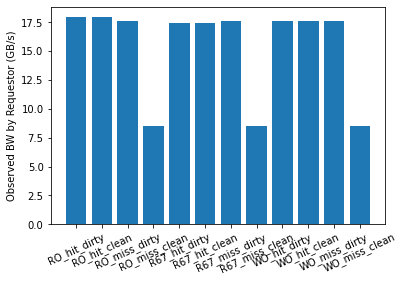

In [14]:
x = [
'RO_hit_dirty',
'RO_hit_clean',
'RO_miss_dirty',
'RO_miss_clean',
'R67_hit_dirty',
'R67_hit_clean',
'R67_miss_dirty',
'R67_miss_clean',
'WO_hit_dirty',
'WO_hit_clean',
'WO_miss_dirty',
'WO_miss_clean'
]

y = df['totBW']

fig = plt.figure()
fig.set_size_inches(6, 4)

plt.bar(x, y)

#plt.title("HBM-DDR4 / Hit / Read67%")
#plt.xlabel("Link Latency (micro-sec)")
plt.xticks(rotation = 25)
plt.ylabel("Observed BW by Requestor (GB/s)")
#plt.legend()
plt.show()



In [15]:
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt

import os

datadir2 = '/home/babaie/projects/ispass2023/runs/hypothesisTest/dramCacheController/myPlots/ddr4/hbm2'


def getStat(filename, stat):
    filename = os.path.join(filename).replace('\\','/')
    #print(stat)
    #print(filename)
    try:
        with open(filename) as f:
            readlines = f.readlines()
            for l in readlines:
                if stat in l:
                    return l
            return 0.0 #for cases where stat was not found
    except: #for cases where the file was not found
        return 0.0



Stats2 = ['system.generator.numPackets',
         'system.generator.avgReadLatency',
         'system.generator.avgWriteLatency',
         'system.generator.readBW',
         'system.generator.writeBW'
          ]




hit_miss = ['hit', 'miss']
rd_perc = ['RO', 'R67', 'WO']
clean = ['clean', 'dirty']

rows = []

for rdPr in rd_perc:
    for hm in hit_miss:
        for cl in clean:
            stats = [rdPr, hm, cl]
            for stat in Stats2:
                time_file_path = '{}/{}_{}_{}/stats.txt'.format(datadir2, rdPr, hm, cl)
                ret_line = getStat(time_file_path,stat)

                if ret_line != 0:
                    #if ret_line=='nan' :
                    #    stat_val = 0
                    #else:
                    stat_val = ret_line.split()[1]
                else:
                    stat_val = -1
                stats.append(stat_val)

            rows.append(stats)

#print(rows)
df2 = pd.DataFrame(rows, columns=[
         'rdPr', 'hm', 'cl',
         'numPackets',
         'avgReadLatency',
         'avgWriteLatency',
         'readBW',
         'writeBW'
         ])

df2['totBW'] = (df2['readBW'].astype(float) + df2['writeBW'].astype(float))/1000000000
df2['ARL'] = (df2['avgReadLatency'].astype(float))/1000
df2['AWL'] = (df2['avgWriteLatency'].astype(float))/1000

df2.to_csv("/home/babaie/projects/ispass2023/runs/hypothesisTest/dramCacheController/myPlots/ddr4/hbm2.csv")

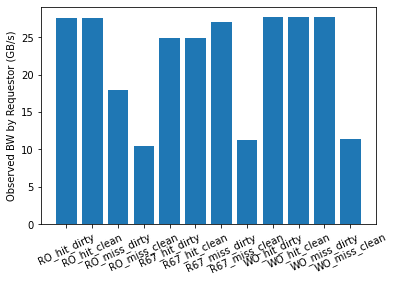

In [16]:
x = [
'RO_hit_dirty',
'RO_hit_clean',
'RO_miss_dirty',
'RO_miss_clean',
'R67_hit_dirty',
'R67_hit_clean',
'R67_miss_dirty',
'R67_miss_clean',
'WO_hit_dirty',
'WO_hit_clean',
'WO_miss_dirty',
'WO_miss_clean'
]

y = df2['totBW']

fig = plt.figure()
fig.set_size_inches(6, 4)

plt.bar(x, y)

#plt.title("HBM-DDR4 / Hit / Read67%")
#plt.xlabel("Link Latency (micro-sec)")
plt.xticks(rotation = 25)
plt.ylabel("Observed BW by Requestor (GB/s)")
#plt.legend()
plt.show()